Dataset generated and saved to 'synthetic_data.csv'.

Summary Statistics:
         Continuous1   Continuous2   Continuous3   Continuous4   Continuous5  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        4.937760      4.979107      4.994707      5.000138      5.016833   
std         2.866980      2.874131      2.874179      2.878923      2.909696   
min         0.001186      0.000003      0.000076      0.000251      0.000620   
25%         2.471124      2.514171      2.536551      2.522048      2.503574   
50%         4.904858      4.959487      5.022543      4.977008      4.952436   
75%         7.413951      7.462812      7.443382      7.486199      7.562732   
max         9.999192      9.999125      9.9969

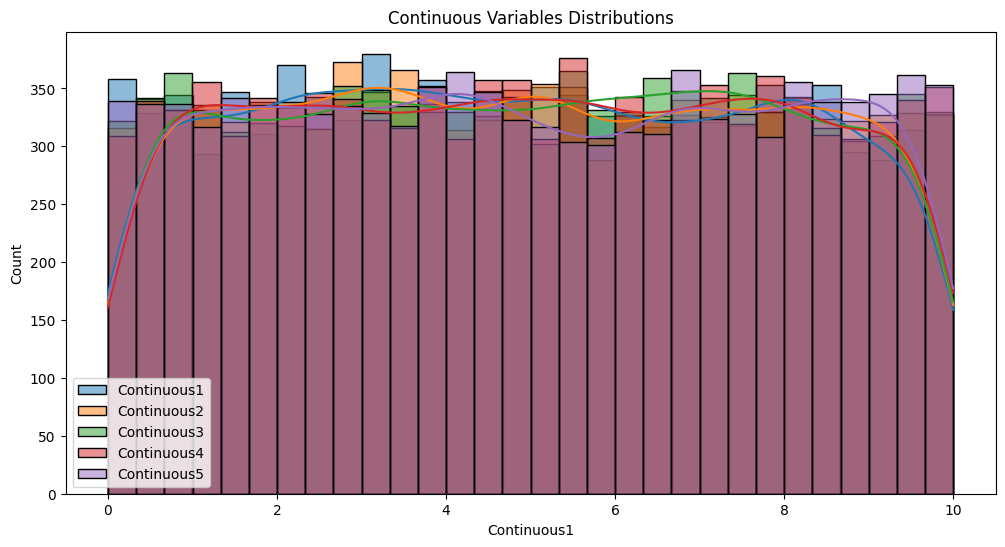

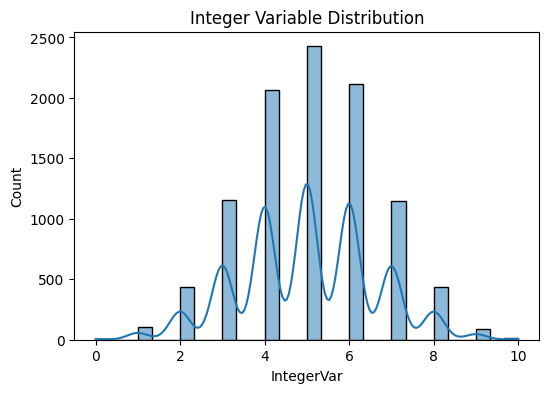

<Figure size 600x400 with 0 Axes>

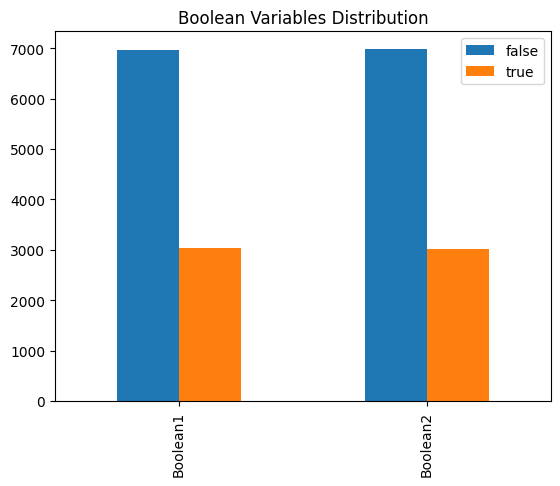

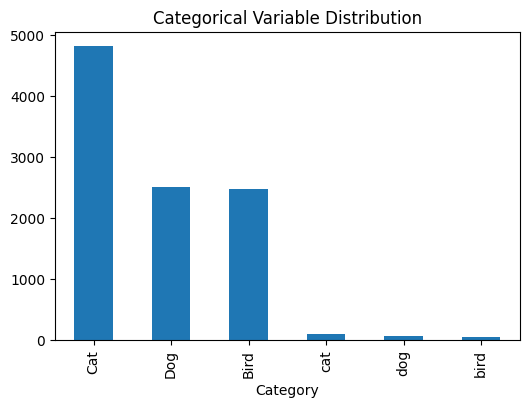

In [1]:
import numpy as np
import pandas as pd
import random
#!pip install matplotlib seaborn


# Function to create a synthetic dataset
#N is the number of rows.
def generate_synthetic_dataset(N):
    # Five continuous variables are generated, each sampled from a uniform distribution between 0 and 10.
    #The shape (N, 5) ensures there are 5 columns for continuous variables.
    # Continuous variables (uniform distribution between 0 and 10)
    continuous_vars = np.random.uniform(0, 10, size=(N, 5))

    # A binomial distribution is used with p=0.5 and n=10
    # Mean= 10⋅0.5=5 Variance=n⋅p⋅(1−p)=10⋅0.5⋅0.5=2.5
    # Integer variable (binomial distribution with mean ~5 and variance ~2.5)
    p_binomial = 0.5
    n_binomial = 10  # Set n to 10 for mean ~5, variance ~2.5
    integer_var = np.random.binomial(n=n_binomial, p=p_binomial, size=N)

    

    # Boolean variables ('true' and 'false', with 'true' having a probability of 0.3)
    #the string 'true' having a 30% probability and 'false' 70%
    boolean_vars = np.random.choice(['true', 'false'], size=(N, 2), p=[0.3, 0.7])


    # Categorical variable ('Bird', 'Dog', 'Cat') with specified probabilities
    #'Cat': 50%, 'Bird': 25%, 'Dog': 25%
    categories = np.random.choice(['Bird', 'Dog', 'Cat'], size=N, p=[0.25, 0.25, 0.5])

    # Convert 2% of categorical entries to lowercase
    n_lowercase = int(0.02 * N)  #Calculating the number of entries
    lowercase_indices = np.random.choice(N, size=n_lowercase, replace=False)#Randomly selecting indices.
    for idx in lowercase_indices:#Modifying the selected entries to lowercase.
        categories[idx] = categories[idx].lower()

    # generated variables are combined into a pandas DataFrame, with appropriate column names.
    # Combine all variables into a DataFrame
    df = pd.DataFrame({
        'Continuous1': continuous_vars[:, 0],
        'Continuous2': continuous_vars[:, 1],
        'Continuous3': continuous_vars[:, 2],
        'Continuous4': continuous_vars[:, 3],
        'Continuous5': continuous_vars[:, 4],
        'IntegerVar': integer_var,
        'Boolean1': boolean_vars[:, 0],
        'Boolean2': boolean_vars[:, 1],
        'Category': categories
    })

    return df

# Generate dataset with N=10,000
N = 10000
dataset = generate_synthetic_dataset(N)

# Save dataset to a CSV file named synthetic_data.csv.
dataset.to_csv("synthetic_data.csv", index=False)

# Validation
print("Dataset generated and saved to 'synthetic_data.csv'.")

# Summary statistics
#include='all' ensures that all column types (numeric, categorical, object, etc.) are included.
summary = dataset.describe(include='all')
print("\nSummary Statistics:")
print(summary)

# Validation for categorical variable proportions
category_counts = dataset['Category'].value_counts(normalize=True)
print("\nCategory Proportions:")
print(category_counts)

# Validation for lowercase conversion
lowercase_counts = dataset['Category'].str.islower().sum()
print(f"\nNumber of lowercase entries in 'Category': {lowercase_counts} (Expected: {0.02 * N})")

# Visualization of distributions (optional)
import matplotlib.pyplot as plt
import seaborn as sns

# Plots histograms with KDE for all five continuous variables.
# This visualizes the uniform distribution between 0 and 10.
# Continuous variables
plt.figure(figsize=(12, 6))
for i in range(1, 6):
    sns.histplot(dataset[f'Continuous{i}'], kde=True, bins=30, label=f'Continuous{i}')
plt.legend()
plt.title('Continuous Variables Distributions')
plt.show()


# Plots the distribution of the integer variable derived from the binomial distribution.
# Demonstrates that the integer variable has the desired mean and variance.
# Integer variable
plt.figure(figsize=(6, 4))
sns.histplot(dataset['IntegerVar'], kde=True, bins=30)
plt.title('Integer Variable Distribution')
plt.show()

# Boolean variables
# Creates a bar plot for the 'true' and 'false' counts in both boolean variables.
# Confirms the proportions of 'true' (30%) and 'false' (70%).
plt.figure(figsize=(6, 4))
boolean_counts = dataset[['Boolean1', 'Boolean2']].apply(pd.Series.value_counts).T
boolean_counts.plot(kind='bar')
plt.title('Boolean Variables Distribution')
plt.show()

# Categorical variable
# Creates a bar plot for the class proportions of the categorical variable.
# Demonstrates that the classes ('Cat', 'Bird', 'Dog') are distributed as specified, with 2% lowercase conversion accounted for.
plt.figure(figsize=(6, 4))
categories_counts = dataset['Category'].value_counts()
categories_counts.plot(kind='bar')
plt.title('Categorical Variable Distribution')
plt.show()



<!-- For Numeric Columns (e.g., IntegerVar): -->
count: Number of non-null values.
mean: Arithmetic mean of the column.
std: Standard deviation.
min: Minimum value.
25%, 50%, 75%: Percentiles (quartiles).
max: Maximum value.

<!-- For Non-Numeric Columns (e.g., Boolean1, Category): -->
count: Number of non-null values.
unique: Number of unique values.
top: Most frequently occurring value.
freq: Frequency of the top value.



# Theoretical Properties for Uniform Distribution (0 to 10)
<!-- 1. Continuous Variables -->

# Mean
lower_bound = 0
upper_bound = 10
mean = (lower_bound + upper_bound) / 2

0+10/2=5

# Variance
variance = ((upper_bound - lower_bound) ** 2) / 12


# Standard Deviation
std_dev = variance ** 0.5


<!-- IntegerVar (Numeric): -->
Statistic	Value	Explanation
count=10000.0	  10,000 rows in the dataset.
mean=5.00650	 Average value of the IntegerVar column.
std=1.55875	     Standard deviation of the column.
min=0.00000	      Smallest value in the column.
25%, 50%, 75%	  Quartiles	Values below which 25%, 50%, and 75% of data lie.

Mean: The means of Continuous1 through Continuous5 are close to 5 (e.g., 4.995949 for Continuous1).
Standard Deviation: The standard deviations (std) are close to 2.88 (e.g., 2.878694 for Continuous1).
Minimum and Maximum: The min values are near 0, and the max values are near 10, consistent with the uniform distribution.

<!-- Boolean1 and Boolean2 (Categorical, Stored as Strings): -->
Statistic	Value	Explanation
count=10000   	10,000 rows in the dataset.
unique=2	    Two unique values: 'true' and 'false'.
top='false'    	Most frequent value in the column.
freq=6940	    Frequency of the most frequent value ('false').
mean, std, etc.	NaN	Not applicable to non-numeric data.

<!-- Category (Categorical): -->
Statistic	Value	Explanation
count=10000	   10,000 rows in the dataset.
unique=6	   Six unique values (including the lowercase versions).
top='Cat'	    Most frequent value.
freq=5014	   Frequency of the most frequent value ('Cat').
mean, std, etc.	NaN	Not applicable to categorical data.

For a column like Category:
Frequency (freq):

The value that appears most frequently is identified (e.g., 'Cat').
Its frequency is the number of occurrences in the column (e.g., freq = 5014).
Proportion:

The proportion of each category is computed as:
Proportion=Frequency of the value/Total Count

For numerical variables (e.g., continuous variables, integer variable), it computes descriptive statistics such as mean, std (standard deviation), min, max, and quartiles (25%, 50%, 75%).
For categorical and boolean variables, it computes counts, unique values, most frequent value (top), and its frequency (freq).


